In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('D:/Datasets/dataset/Data_train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [7]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [8]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [9]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [10]:
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [11]:
df.drop('Dep_Time',axis='columns',inplace=True)

In [12]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

In [13]:
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [14]:
df.drop('Arrival_Time',axis='columns',inplace=True)

In [15]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if (len(duration[i].split())!=2):
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        elif 'm' in duration[i]:
            duration[i]="0h "+duration[i].strip()

            
duration_hour=[]
duration_min=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split('h')[0]))
    duration_min.append(int(duration[i].split('m')[0].split()[-1]))

df['Duration_hour']=duration_hour
df['Duration_min']=duration_min

In [16]:
df["Duration_hours"] = duration_hour
df["Duration_mins"] = duration_min

In [17]:
df.drop('Duration',axis=1,inplace=True)

In [18]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

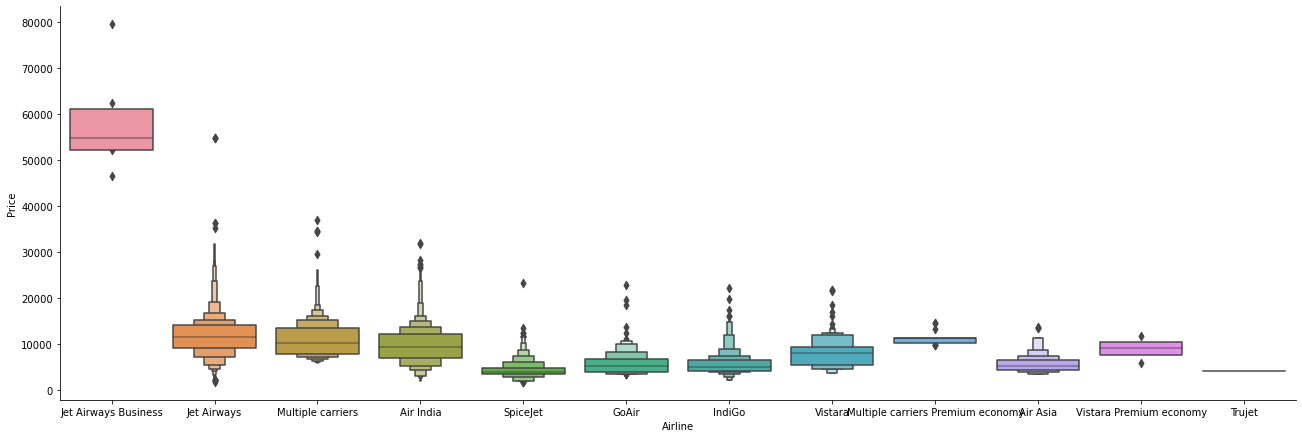

In [19]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

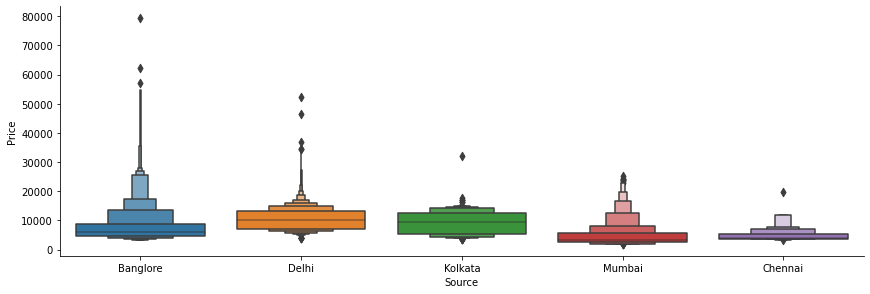

In [20]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [21]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [22]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [24]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,2,40


In [153]:
import statsmodels.formula.api as smf

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
cols=['Airline','Source','Destination']

In [31]:
df[cols] = df[cols].apply(le.fit_transform)

In [32]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40,2,40


In [33]:
y=df['Price']

In [34]:
X=df.drop('Price',axis=1)

In [35]:
X

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,3,0,5,0,24,3,22,20,1,10,2,50,2,50
1,1,3,0,2,1,5,5,50,13,15,7,25,7,25
2,4,2,1,2,9,6,9,25,4,25,19,0,19,0
3,3,3,0,1,12,5,18,5,23,30,5,25,5,25
4,3,0,5,1,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,9,4,19,55,22,25,2,30,2,30
10679,1,3,0,0,27,4,20,45,23,20,2,35,2,35
10680,4,0,2,0,27,4,8,20,11,20,3,0,3,0
10681,10,0,5,0,1,3,11,30,14,10,2,40,2,40


In [36]:
X.describe()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,0.824190,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,10.244898,28.326624
std,2.352090,1.177276,1.474845,0.675229,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,8.494916,16.945817
min,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,1.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,1.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,47.000000,55.000000


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
lm1 = smf.ols(formula='y~X',data=df).fit()

In [42]:
lm1.params

Intercept    8550.899884
X[0]          184.040005
X[1]         -294.696115
X[2]          118.698392
X[3]         3796.114076
X[4]          -82.790508
X[5]         -492.901971
X[6]           45.166200
X[7]           -6.630045
X[8]           -5.868471
X[9]           -6.697645
X[10]          34.129031
X[11]          -5.933087
X[12]          34.129031
X[13]          -5.933087
dtype: float64

In [43]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     689.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:34:31   Log-Likelihood:            -1.0221e+05
No. Observations:               10682   AIC:                         2.044e+05
Df Residuals:                   10669   BIC:                         2.045e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8550.8999    277.278     30.839      0.000    8007.383    9094.416
X[0]         184.0400     14.681     12.536      0.000     155.262     212.818
X[1]        -294.6961     35.805     -8.231      0.000    -364.881    -224.511
X[2]         118.6984     31.195      3.805      0.000      57.550     179.846
X[3]        3796.1141     76.362     49.712      0.000    3646.431    3945.797
X[4]         -82.7905      3.969    -20.861      0.000     -90.570     -75.011
X[5]        -492.9020     31.331    -15.732      0.000    -554.316    -431.488
X[6]          45.1662      5.904      7.650      0.000      33.594      56.739
X[7]          -6.6300      1.817     -3.649      0.000     -10.192      -3.068
X[8]          -5.8685      4.986     -1.177      0.239     -15.641       3.904
X[9]          -6.6976      2.112     -3.172      0.002     -10.837      -2.558
X[10]         34.1290      2.956     11.545      0.000      28.334      39.924
X[11]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
X[12]         34.1290      2.956     11.545      0.000      28.334      39.924
X[13]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
==============================================================================
Omnibus:                     7930.319   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508757.158
Skew:                           2.978   Prob(JB):                         0.00
Kurtosis:                      36.281   Cond. No.                     2.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
X

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,3,0,5,0,24,3,22,20,1,10,2,50,2,50
1,1,3,0,2,1,5,5,50,13,15,7,25,7,25
2,4,2,1,2,9,6,9,25,4,25,19,0,19,0
3,3,3,0,1,12,5,18,5,23,30,5,25,5,25
4,3,0,5,1,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,9,4,19,55,22,25,2,30,2,30
10679,1,3,0,0,27,4,20,45,23,20,2,35,2,35
10680,4,0,2,0,27,4,8,20,11,20,3,0,3,0
10681,10,0,5,0,1,3,11,30,14,10,2,40,2,40


In [45]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     689.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:34:32   Log-Likelihood:            -1.0221e+05
No. Observations:               10682   AIC:                         2.044e+05
Df Residuals:                   10669   BIC:                         2.045e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8550.8999    277.278     30.839      0.000    8007.383    9094.416
X[0]         184.0400     14.681     12.536      0.000     155.262     212.818
X[1]        -294.6961     35.805     -8.231      0.000    -364.881    -224.511
X[2]         118.6984     31.195      3.805      0.000      57.550     179.846
X[3]        3796.1141     76.362     49.712      0.000    3646.431    3945.797
X[4]         -82.7905      3.969    -20.861      0.000     -90.570     -75.011
X[5]        -492.9020     31.331    -15.732      0.000    -554.316    -431.488
X[6]          45.1662      5.904      7.650      0.000      33.594      56.739
X[7]          -6.6300      1.817     -3.649      0.000     -10.192      -3.068
X[8]          -5.8685      4.986     -1.177      0.239     -15.641       3.904
X[9]          -6.6976      2.112     -3.172      0.002     -10.837      -2.558
X[10]         34.1290      2.956     11.545      0.000      28.334      39.924
X[11]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
X[12]         34.1290      2.956     11.545      0.000      28.334      39.924
X[13]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
==============================================================================
Omnibus:                     7930.319   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508757.158
Skew:                           2.978   Prob(JB):                         0.00
Kurtosis:                      36.281   Cond. No.                     2.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [48]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature        VIF
0          Airline   3.739630
1           Source   5.078316
2      Destination   2.493959
3      Total_Stops   5.705546
4      Journey_day   3.335968
5    Journey_month  11.867937
6         Dep_hour   5.421739
7          Dep_min   2.748519
8     Arrival_hour   4.514208
9      Arrival_min   3.250677
10   Duration_hour        inf
11    Duration_min        inf
12  Duration_hours        inf
13   Duration_mins        inf


C:\Users\Abdul Samad\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [49]:
lm1 = smf.ols(formula='y~X', data=df).fit()

In [50]:
lm1.params

Intercept    8550.899884
X[0]          184.040005
X[1]         -294.696115
X[2]          118.698392
X[3]         3796.114076
X[4]          -82.790508
X[5]         -492.901971
X[6]           45.166200
X[7]           -6.630045
X[8]           -5.868471
X[9]           -6.697645
X[10]          34.129031
X[11]          -5.933087
X[12]          34.129031
X[13]          -5.933087
dtype: float64

In [51]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     689.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:34:33   Log-Likelihood:            -1.0221e+05
No. Observations:               10682   AIC:                         2.044e+05
Df Residuals:                   10669   BIC:                         2.045e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8550.8999    277.278     30.839      0.000    8007.383    9094.416
X[0]         184.0400     14.681     12.536      0.000     155.262     212.818
X[1]        -294.6961     35.805     -8.231      0.000    -364.881    -224.511
X[2]         118.6984     31.195      3.805      0.000      57.550     179.846
X[3]        3796.1141     76.362     49.712      0.000    3646.431    3945.797
X[4]         -82.7905      3.969    -20.861      0.000     -90.570     -75.011
X[5]        -492.9020     31.331    -15.732      0.000    -554.316    -431.488
X[6]          45.1662      5.904      7.650      0.000      33.594      56.739
X[7]          -6.6300      1.817     -3.649      0.000     -10.192      -3.068
X[8]          -5.8685      4.986     -1.177      0.239     -15.641       3.904
X[9]          -6.6976      2.112     -3.172      0.002     -10.837      -2.558
X[10]         34.1290      2.956     11.545      0.000      28.334      39.924
X[11]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
X[12]         34.1290      2.956     11.545      0.000      28.334      39.924
X[13]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
==============================================================================
Omnibus:                     7930.319   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508757.158
Skew:                           2.978   Prob(JB):                         0.00
Kurtosis:                      36.281   Cond. No.                     2.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
lm1 = smf.ols(formula='y~X', data=df).fit()

In [53]:
result=lm1.params

In [54]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     689.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:34:34   Log-Likelihood:            -1.0221e+05
No. Observations:               10682   AIC:                         2.044e+05
Df Residuals:                   10669   BIC:                         2.045e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8550.8999    277.278     30.839      0.000    8007.383    9094.416
X[0]         184.0400     14.681     12.536      0.000     155.262     212.818
X[1]        -294.6961     35.805     -8.231      0.000    -364.881    -224.511
X[2]         118.6984     31.195      3.805      0.000      57.550     179.846
X[3]        3796.1141     76.362     49.712      0.000    3646.431    3945.797
X[4]         -82.7905      3.969    -20.861      0.000     -90.570     -75.011
X[5]        -492.9020     31.331    -15.732      0.000    -554.316    -431.488
X[6]          45.1662      5.904      7.650      0.000      33.594      56.739
X[7]          -6.6300      1.817     -3.649      0.000     -10.192      -3.068
X[8]          -5.8685      4.986     -1.177      0.239     -15.641       3.904
X[9]          -6.6976      2.112     -3.172      0.002     -10.837      -2.558
X[10]         34.1290      2.956     11.545      0.000      28.334      39.924
X[11]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
X[12]         34.1290      2.956     11.545      0.000      28.334      39.924
X[13]         -5.9331      1.031     -5.756      0.000      -7.953      -3.913
==============================================================================
Omnibus:                     7930.319   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508757.158
Skew:                           2.978   Prob(JB):                         0.00
Kurtosis:                      36.281   Cond. No.                     2.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
lm1.mse_resid

11993487.885233767

In [56]:
lm1.mse_total

21266382.42788254

In [57]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40,2,40


In [58]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,19,55,22,25,2,30,2,30
10679,1,3,0,0,4145,27,4,20,45,23,20,2,35,2,35
10680,4,0,2,0,7229,27,4,8,20,11,20,3,0,3,0
10681,10,0,5,0,12648,1,3,11,30,14,10,2,40,2,40


In [59]:
y1=df['Price']

In [60]:
x=df.drop('Price',axis=1)

In [61]:
x.drop(['Duration_hours','Duration_mins'],axis=1,inplace=True)

In [101]:
x=pd.get_dummies(x,columns=['Airline','Source','Destination'])

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

In [103]:
x_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_0,...,Source_1,Source_2,Source_3,Source_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
10005,1,27,5,8,30,19,15,10,45,0,...,0,1,0,0,0,1,0,0,0,0
3684,1,9,5,11,30,12,35,25,5,0,...,0,1,0,0,0,1,0,0,0,0
1034,1,24,4,15,45,22,5,6,20,0,...,0,1,0,0,0,1,0,0,0,0
3909,1,21,3,12,50,1,35,12,45,0,...,0,1,0,0,0,1,0,0,0,0
3088,2,24,6,17,15,19,15,26,0,0,...,0,1,0,0,0,1,0,0,0,0


In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rfr=RandomForestRegressor(n_estimators=100)

In [106]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

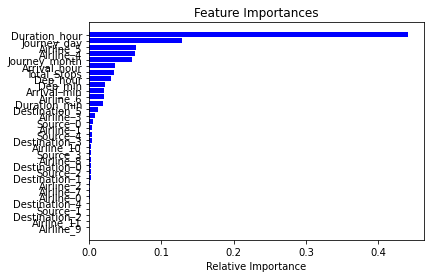

In [107]:
features=x.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [108]:
predictions=rfr.predict(x_test)

In [109]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

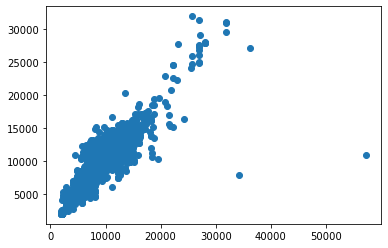

In [110]:
plt.scatter(y_test,predictions)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Price', ylabel='Density'>

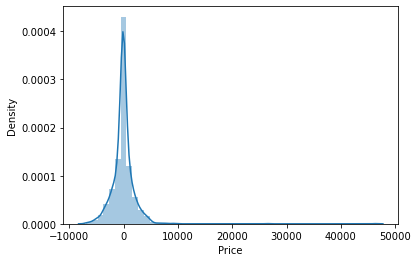

In [111]:
sns.distplot((y_test-predictions),bins=50)

In [112]:
from sklearn import metrics

In [113]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', (metrics.r2_score(y_test, predictions)))

MAE: 1178.994765390215
MSE: 4400184.1307182
RMSE: 2097.661586318966
r2_score: 0.7959292905757097


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [115]:
from sklearn.metrics import r2_score,make_scorer

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
regg=[LinearRegression(),RandomForestRegressor(),SVR(),DecisionTreeRegressor()]

In [118]:
mean=[]
std=[]
for i in regg:
    cvs=cross_val_score(i,x,y1,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

In [119]:
for i in range(4):
    print(regg[i].__class__.__name__,':',mean[i])

LinearRegression : 0.619639312355526
RandomForestRegressor : 0.8124273070787167
SVR : 0.003572870934856387
DecisionTreeRegressor : 0.7138827381555088


In [149]:
import shap

In [121]:
explainer = shap.TreeExplainer(rfr)

In [122]:
shap_values = explainer.shap_values(x_test)

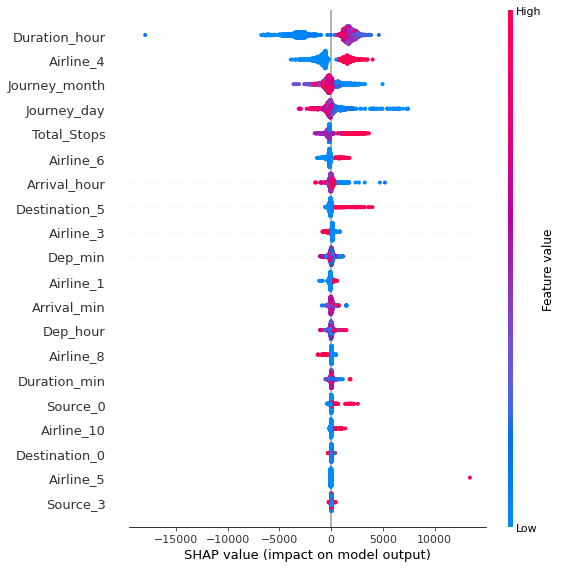

In [123]:
shap.summary_plot(shap_values, x_test)

In [124]:
shap_values_partition = explainer(x_train[:100])

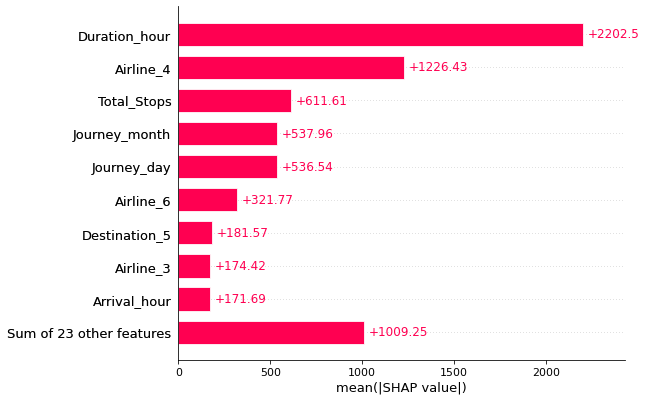

In [125]:
shap.plots.bar(shap_values_partition)

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [128]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [129]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [130]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [131]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [132]:
prediction = rf_random.predict(x_test)

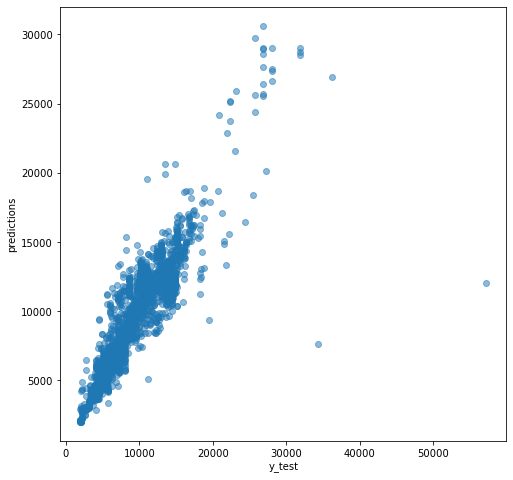

In [133]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Price', ylabel='Density'>

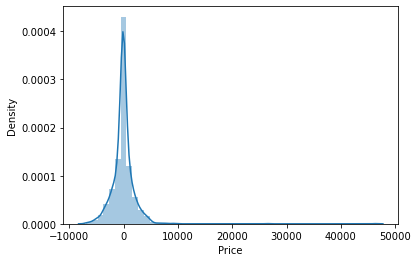

In [134]:
sns.distplot((y_test-predictions),bins=50)

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.034021782588
MSE: 4058771.4607764008
RMSE: 2014.6392880057713


In [141]:
import pickle

In [142]:
file = open('flight_price_pred.pkl', 'wb')

In [143]:
pickle.dump(rfr, file)

In [144]:
model = open('flight_price_pred.pkl','rb')
forest = pickle.load(model)